# Regression von Messdaten

In diesem Kapitel wird erklärt, wie anhand vorhandener Daten eine geeignete Regression mit der Methode der kleinsten Fehlerquadratesumme erstellet wird. Dies ist entscheidend für die Bestimmung von Maximal- und Minimalwerten.

---

Für die Bestimmung einer Regressionskurve wird ein bereits bekanntes Python-Paket genutzt `numpy`. Im Folgenden wird dargestellt, welche `numpy`-Funktionen für die Regression genutzt werden können. Zunächst aber zur Methode der Regression selbst:

Es gibt verschiedene Verfahren, um eine Ausgleichsfunktion an einen vorhandenen Datensatz anzupassen, aber wieso die Mühe? Jede Messreihe enthält endlich viele Datenpunkte. Betrachten wir erneut unsere Messdaten der Windkraftanlage:

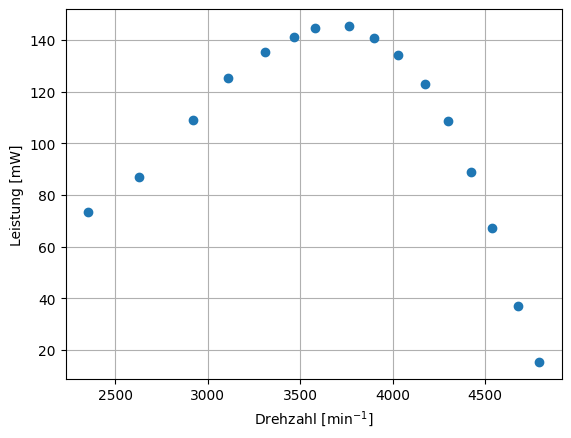

In [1]:
import matplotlib.pyplot as plt
import numpy as np
Drehzahl, Spannung, Stromstärke = np.loadtxt("Data/Messdaten_Versuch1.txt",unpack=True)
Leistung = Spannung * Stromstärke # Berechnung der Leistung (in mW) aus Spannung (in V) und Stromstärke (in mA)

# Graphen
plt.plot(Drehzahl,Leistung,"o",)

# Achsenbeschriftung
plt.xlabel(r"$ \mathregular{Drehzahl ~ [min^{-1}]}$")
plt.ylabel("Leistung [mW]")

# Gitternetz
plt.grid()

plt.show()

Wie im Diagramm zu sehen, oder auch durch den `len(Variable)` Befehl auslesbar, haben wir 16 Datenpaare im Drehzahl-Bereich von etwa (2500-5000) min$^{-1}$. Unsere Aufgabe ist es nun, den Punkt maximaler Leistung (*Maximum-Power-Point*, MPP) herauszufinden. Auf den ersten Blick ist dies einfach der höchste Wert, den der Array `Leistung` enthält, also über `np.max(Leistung)` einfach zu bestimmen. Den resultierenden Wert können wir erneut in einer Variable `max_Leistung` ablegen durch `max_Leistung = np.max(Leistung)`.

In [2]:
max_Leistung = np.max(Leistung)
max_Leistung

np.float64(145.432)

Um den Datensatz zu vervollständigen benötigen wir noch die dazugehörige Drehzahl. Diese legen wir ebenfalls direkt in einer neuen Variable `Drehzahl_max_Leistung` ab. Dafür suchen wir den Eintrag in dem Array `Drehzahl`, der denselben Index wie der Eintrag in dem Array `Leistung` hat durch 
``` python
Drehzahl_max_Leistung = Drehzahl[Leistung==max_Leistung]
````
Beachten Sie, dass für Gleichheiten nicht `=`, sondern ein doppeltes Gleichzeichen `==` verwendet wird. Ein einzelnes Gleichzeichen steht in der Python-Syntax immer für eine Definition.

In [3]:
Drehzahl_max_Leistung = Drehzahl[Leistung==max_Leistung]
Drehzahl_max_Leistung

array([3766.])

Somit wurde die maximale Leistung auf **145.432 mW** bei einer Drehzahl von **3766 min$^{-1}$** bestimmt. Schauen wir uns den entsprechenden Bereich noch einmal genauer an:

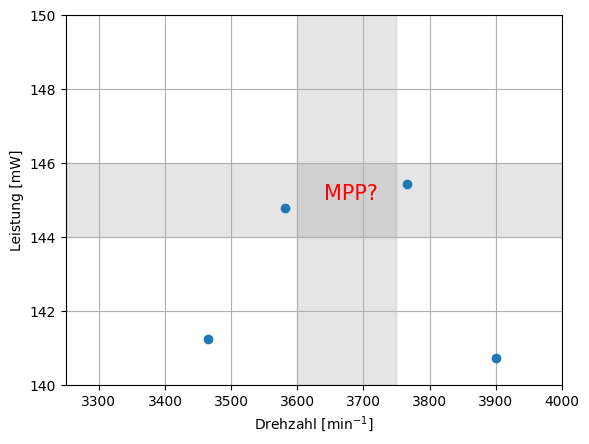

In [4]:
# Graphen
plt.plot(Drehzahl,Leistung,"o",)

# Achsenbeschriftung
plt.xlabel(r"$ \mathregular{Drehzahl ~ [min^{-1}]}$")
plt.ylabel("Leistung [mW]")

# Gitternetz
plt.grid()
plt.xlim(3250, 4000)
plt.ylim(140, 150)

plt.text(3640, 145, "MPP?", color="red", size=15)

plt.axvspan(3600, 3750, color="grey", alpha=0.2)
plt.axhspan(144, 146, color="grey", alpha=0.2)

plt.show()

In der oben stehenden Abbildung ist zu sehen, dass bis etwa 3600 min$^{-1}$ die Messwerte stetig steigen, ab dem Datenpunkt bei 3766 min$^{-1}$, jedoch stetig fallen. Wie eingangs erwähnt können bei jeder Messreihe nur eine *endliche* Anzahl an Messpunkten aufgezeichnet werden können - aus Zeit-, Kosten- und Effizienzgründen. Um den ***genauen*** Punkt maximaler Leistung zu finden, könnten nun in dem dargestellten Bereich weitere Messungen durchgeführt werden, oder aber das Problem wird mathematisch betrachtet.

In der Technik und Wissenschaft werden dafür in der Regel Regressionsgleichungen an die vorhandenen Datenpunkte "konstruiert". Dafür wird die eingangs erwähnte *Methode der kleinsten Fehlerquadratesumme* verwendet. Mit dieser Methode wird eine Funktion gesucht, die über den Messbereich insgesamt die geringste Abweichung von den Datenpunkten aufweist. Dieses iterative Verfahren beherrschen verschiedene Programme seit langer Zeit, da sie sehr weit verbreitet ist.

Durch diese mathematische Betrachtung sind nur soviele Messpunkte nötig, dass die Funktion hinreichend genau beschrieben werden kann. Ein Faktor, der angibt wie gut der "fit" der konstruierten Kurve an den Graphen ist, ist das Quadrat der Abweichung $r²$. Im Allgemeinen gilt, dass ein Wert von $r²\geq 0.99$ ausreichend genau ist. Dabei sollte die Ordnung der gewählten polynomischen Funktion so gewählt werden, dass die oben stehende Bedingung gerade so erfüllt wird. Werden darüber hinaus polynome höherer Ordnung für den fit verwendet, wird von einem *"overfitting"* gesprochen. Für dieses Praktikum sollten Sie entweder lineare (Polynome 1. Ordnung), quadratische (2. Ordnung) oder kubische (3. Ordnung) Regressionen verwenden. Höhere sollten nicht benötigt werden.

Für unser Beispiel konstruieren wir nun ein Polynom 3. Ordnung, also eine kubische Funktion, mit der Formel: $$ y= a x³ + b x² + c x + d $$

$y$ ist dabei nach wie vor die Leistung und $x$ die Drehzahl. Die Koeffizienten $a, b, c,$ und $d$ werden durch das Programm, in unserem Falle das `numpy`-Paket in Python, so variiert, dass $r²$ möglichst klein wird. Dafür nutzen wir `np.poly1d()` und `np.polyfit()`.

`np.polyfit()` führt dabei die mathematische Berechnung nach der Methode der kleinsten Fehlerquadrate durch. Dafür werden als Argumente
``` python
`np.polyfit(x-Werte, y-Werte, Grad des Polynoms)
```` 
benötigt, also in unserem Fall 
```` python 
np.polyfit(Drehzahl, Leistung, 3)
```` 
für eine Regression dritter Ordnung.

`np.poly1d()` extrahiert aus dem entstandenen Fit die Koeffizienten, in unserem Fall $a, b, c,$ und $d$ in ein Array. Dieses können wir wiederum in einer Variable speichern, z.B. in `Regression`. Der gesamte Befehl lautet dann:

```` python
Regression = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))
````

In [5]:
Regression = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))
Regression

poly1d([-2.75121088e-08,  2.25764971e-04, -5.43547730e-01,  4.58409953e+02])

Um nun diese Ausgleichskurve zu zeichnen, müssen wir Python explizite Werte mit den gerade berechneten Parmetern bestimmen lassen. Dies geht am einfachsten durch den Bereits bekannten `np.linspace()`-Befehl. Die Daraus entstandenen Werte zeichnen wir zusammen mit den gemessenen Datenpunkten in ein gemeinsames Diagramm.

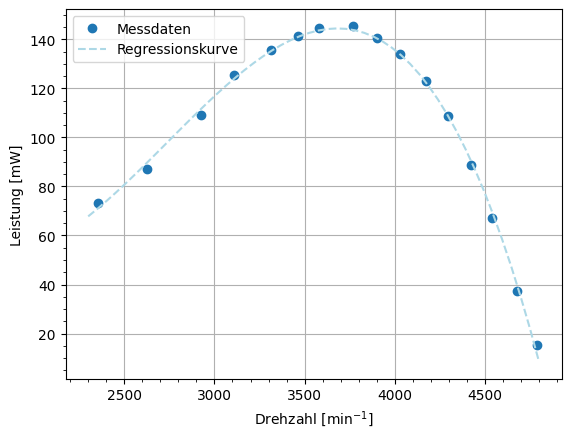

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fit einer kubischen Regressionskurve
Regression = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))

# Zeichnen der Regressionskurve und der Messdaten
Regressionskurve = np.linspace(2300, 4800, 50)
plt.plot(Drehzahl, Leistung, "o", label="Messdaten")
plt.plot(Regressionskurve, Regression(Regressionskurve), "--", color="lightblue", label="Regressionskurve")

# Achsenbeschriftungen
plt.xlabel(r"$ \mathregular{Drehzahl ~ [min^{-1}]}$")
plt.ylabel("Leistung [mW]")

# Gitternetz
plt.minorticks_on()
plt.grid()

# Legende
plt.legend()

# Diagramm zeichnen
plt.show()

Um zu überprüfen, wie gut die Regression zu den vorgegebenen Daten passt dient das sogenannte Bestimmtheitsmaß $R²$. Dies wird anhand der folgenden Formeln berechnet:

Summe der Residuen-Quadrate $SSR$:
$$ SSR = \sum (y_ \mathrm{Messung} - y_ \mathrm{Regression})²$$
Gesamtstreuung $SST_\mathrm{ges}$:
$$ SST = \sum (y_ \mathrm{Messung} - \bar y)²$$
Daraus kann das Bestimmtheitsmaß $R²$ berechnet werden:
$$ R²=1- (\frac{SSR}{SST}) $$

Zur Bildung der Summenparameter kann die `np.sum()`-Funktion und für den Mittelwert die `np.mean()`-Funktion verwendet werden. Der gesamte Code lautet dann:

In [7]:
# Vorhergesagte Werte durch die Regressionsfunktion
Leistung_pred = Regression(Drehzahl)

# Berechnung der Summe der Quadrate der Residuen (SSR)
SSR = np.sum((Leistung - Leistung_pred) ** 2)

# Berechnung der Gesamtstreuung (SST)
SST = np.sum((Leistung - np.mean(Leistung)) ** 2)

# Berechnung des Bestimmtheitsmaßes R²
R_squared = 1 - (SSR / SST)

print(f"Bestimmtheitsmaß (R²): {R_squared:.4f}")


Bestimmtheitsmaß (R²): 0.9974


Das R² ist somit >0.99 und damit ein ausreichend guter Fit für die vorliegenden Messdaten.

Analog funktioniert das Verfahren für Polynome niedrigeren oder höheren Grades. Um zu überprüfen, ob auch eine quadratische Funktion ausreicht hätte können wir den Code von oben erneut ausführen, jedoch mit dem Polynom-Grad `2`:

In [8]:
# Fit einer quadratischen Regressionskurve
Regression = np.poly1d(np.polyfit(Drehzahl, Leistung, 2))

# Vorhergesagte Werte durch die Regressionsfunktion
Leistung_pred = Regression(Drehzahl)

# Berechnung der Summe der Quadrate der Residuen (SSR)
SSR = np.sum((Leistung - Leistung_pred) ** 2)

# Berechnung der Gesamtstreuung (SST)
SST = np.sum((Leistung - np.mean(Leistung)) ** 2)

# Berechnung des Bestimmtheitsmaßes R²
R_squared = 1 - (SSR / SST)

print(f"Bestimmtheitsmaß (R²): {R_squared:.4f}")

Bestimmtheitsmaß (R²): 0.9450


Die quadratische Regressionfunktion ist mit einem Bestimmtheitsmaß von 0.95 also nicht geeignet. Zum Vergleich verschiedener Regressionskurven können Sie auch mehrere in ein Diagramm zeichnen:

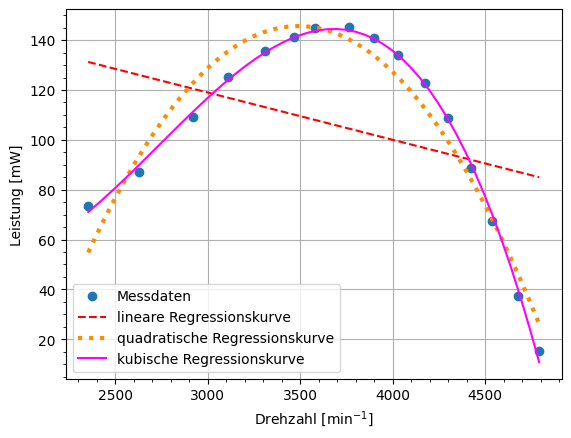

In [9]:
# Fit dreier Regressionskurven
Regression_linear = np.poly1d(np.polyfit(Drehzahl, Leistung, 1))
Regression_quadratisch = np.poly1d(np.polyfit(Drehzahl, Leistung, 2))
Regression_kubisch = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))

# Zeichnen der Regressionskurve und der Messdaten
Regressionskurve = np.linspace(min(Drehzahl), max(Drehzahl), 50)
plt.plot(Drehzahl, Leistung, "o", label="Messdaten")
plt.plot(Regressionskurve, Regression_linear(Regressionskurve), "--", color="red", label="lineare Regressionskurve")
plt.plot(Regressionskurve, Regression_quadratisch(Regressionskurve), ":", color="darkorange", linewidth=3, label="quadratische Regressionskurve")
plt.plot(Regressionskurve, Regression_kubisch(Regressionskurve), "-", color="magenta", label="kubische Regressionskurve")

# Achsenbeschriftungen
plt.xlabel(r"$ \mathregular{Drehzahl ~ [min^{-1}]}$")
plt.ylabel("Leistung [mW]")

# Gitternetz
plt.minorticks_on()
plt.grid()

# Legende
plt.legend()

# Diagramm zeichnen
plt.show()

Da es für das menschliche Auge nicht wirklich erkennbar ist, ob ein Graph "gut genug" an Messdaten fitted, sollten Sie lieber iterativ verschiedene Fits und deren Bestimmtheitsmaß berechnen.

In [10]:
# Fit dreier Regressionskurven
Regression_linear = np.poly1d(np.polyfit(Drehzahl, Leistung, 1))
Regression_quadratisch = np.poly1d(np.polyfit(Drehzahl, Leistung, 2))
Regression_kubisch = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))

# Vorhergesagte Werte durch die Regressionsfunktion
Leistung_pred_linear = Regression_linear(Drehzahl)
Leistung_pred_quadratisch = Regression_quadratisch(Drehzahl)
Leistung_pred_kubisch = Regression_kubisch(Drehzahl)

# Berechnung der Summe der Quadrate der Residuen (SSR)
SSR_linear = np.sum((Leistung - Leistung_pred_linear) ** 2)
SSR_quadratisch = np.sum((Leistung - Leistung_pred_quadratisch) ** 2)
SSR_kubisch = np.sum((Leistung - Leistung_pred_kubisch) ** 2)

# Berechnung der Gesamtstreuung (SST)
SST_linear = np.sum((Leistung - np.mean(Leistung)) ** 2)
SST_quadratisch = np.sum((Leistung - np.mean(Leistung)) ** 2)
SST_kubisch = np.sum((Leistung - np.mean(Leistung)) ** 2)

# Berechnung des Bestimmtheitsmaßes R²
R_squared_linear = 1 - (SSR_linear / SST_linear)
R_squared_quadratisch = 1 - (SSR_quadratisch / SST_quadratisch)
R_squared_kubisch = 1 - (SSR_kubisch / SST_kubisch)

print(f"Bestimmtheitsmaß (R²): {R_squared_linear:.4f}", "linear")
print(f"Bestimmtheitsmaß (R²): {R_squared_quadratisch:.4f}", "quadratisch")
print(f"Bestimmtheitsmaß (R²): {R_squared_kubisch:.4f}", "kubisch")

Bestimmtheitsmaß (R²): 0.1229 linear
Bestimmtheitsmaß (R²): 0.9450 quadratisch
Bestimmtheitsmaß (R²): 0.9974 kubisch


## Bestimmung von Extremwerten

Nachdem die Bestimmung einer geeigneten Regressionskurve gelungen ist, wird nun noch das eigentliche Problem angegangen: die **Extremwertbestimmung**. Dies erfolgt nach klassischer linearer Algebra.

Um die Extremwerte einer Funktion zu bestimmen, müssen folgende Bedingungen erfüllt sein:
$$f'(x)=0 ~ \mathrm{und}~ f''(x)> 0~ \mathrm{(Maximum)} ~ \mathrm{oder} f''(x)<0 ~\mathrm{(Minimum)} $$

>Wichtig ist, dass wir keine Aussagen treffen können über das Verhalten außerhalb des Messbereichs (Extrapolation)!

Liegt also ein (errechneter) Maximalwert außerhalb des Messbereichs, so ist dieser für unsere Messung nicht relevant. Sollte ein linearer Zusammenhang der Messdaten bestehen, oder im gesamten Messbereich die Messwerte stetig steigen, so liegt der zu errechnende Extremwert am Rande des Messbereichs.

Anhand der obigen Daten für die kubische Regression berechnen wir nun die Ableitung und setzen diese gleich 0. In unserem Fall erhalten wir dabei stets 2 Lösungen, wovon mindestens eine reale Lösung sein muss, da wir anhand des Graphen sehen, dass ein Extremwert in unserem betrachteten Messbereich liegt.

Um die Ableitung eines Polynoms zu bestimmen, kann einfach die Funktion `np.polyder()` verwendet werden. Diese erstellt erneut ein numpy-Array mit den Koeffizienten der Ableitung. Die zweite Ableitung kann demnach durch `np.polyder(np.polyder())` gebildet werden. Um nun die Extremstellen zu finden, muss diese Ableitung gleich null gesetzt werden. Im englischen werden die Nullstellen als *roots* bezeichnet, daher lautet die Funktion zur Findung von Nullstellen `np.roots()`.

In [11]:
Regression = np.poly1d(np.polyfit(Drehzahl, Leistung, 3))
Ableitung=np.polyder(Regression)
zweite_Ableitung=np.polyder(Ableitung)
Nullstellen=np.roots(Ableitung)

print(Ableitung)
print(zweite_Ableitung)
print(Nullstellen)

            2
-8.254e-08 x + 0.0004515 x - 0.5435
 
-1.651e-07 x + 0.0004515
[3682.19392655 1788.48743781]


Nun überprüfen wir die zweite Bedingung ($f''(x)> 0~ \mathrm{(Maximum)} ~ \mathrm{oder} f''(x)<0 ~\mathrm{(Minimum)}$ für die beiden gefundenen Nullstellen, indem wir die Nullstellen in die zweite Ableitung einsetzen.

In [12]:
zweite_Ableitung(Nullstellen)

array([-0.0001563,  0.0001563])

Diese Abfrage kann auch durch einen Wenn-Dann-Befehl erfolgen, z.B. durch:

In [13]:
for x in Nullstellen:
    wert_zweite_ableitung = zweite_Ableitung(x)
    if wert_zweite_ableitung > 0:
        print(f"x = {x:.2f} ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"x = {x:.2f} ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"x = {x:.2f} könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

x = 3682.19 ist ein Maximum (f''(x) = -0.0002)
x = 1788.49 ist ein Minimum (f''(x) = 0.0002)


Die beiden Nullstellen sind somit bei einer Drehzahl von $3682$ und $1788$ min$^{-1}$ zu finden. Der erste Wert liegt dabei im betrachteten Messbereich und ist der einzige Relevante für die Aufgabe. Um die zugehörige Leistung zu der Drehzahl zu finden, muss nun noch final diese Drehzahl in die Regressions-Funktion eingesetzt werden.

In [14]:
MPP=Regression(Nullstellen[0])
print(MPP, "mW")

144.45989536111693 mW


---

Sie können nun polynomiale Regressionen anhand Ihrer Messdaten erstellen, Bestimmtheitsmaß und Extremstellen berechnen und dadurch die Extremwerte bestimmen. Diese Informationen können Sie in einem Diagramm darstellen.

Im nächsten [Kapitel](Protokollerstellung.ipynb) wird gezeigt, wie Sie mit Hilfe des Jupyter Notebooks zu einem Abgabefähigen Protokoll kommen.